## Load in dataset and construct training and test set

In [1]:
#Load the dataset using pandas and numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Filename [CHANGE THIS TO YOUR FILENAME FOR SUSY]
filename='SUSY.csv'

#Read in SUSY File. We will only work with subset of data for demonstration purposes.

features=['SUSY','lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 
 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 
 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

low_features=['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 
 'missing energy magnitude', 'missing energy phi']

high_features=['MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2','S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

#Number of datapoints to work with
N = 100000
print("Size of dataset : %i"%N)
df = pd.read_csv(filename, header=None,nrows=N,engine='python')
df.columns=features
y = df['SUSY'].values
X = df[[col for col in df.columns if col!="SUSY"]]

#Make datasets using only the 8 low-level features and 10 high-level features
X_low=X[low_features]
X_high=X[high_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=0)
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y, test_size=.1, random_state=0)
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y, test_size=.1, random_state=0)

Size of dataset : 100000


# Train and test models

In [42]:
# For next cell
from sklearn.metrics import roc_auc_score
import time
import xgboost as xgb
import warnings

warnings.filterwarnings(action='ignore', category=DeprecationWarning)

print("Training on %i examples with %i features"%X_train.shape)

#Use default parameters and train on full dataset
XGBclassifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, n_estimators=1000)
#Train and time classifier
start_time = time.time()
XGBclassifier.fit(X_train, y_train)
run_time = time.time() - start_time

#Make Predictions
print("Predicting on %i examples with %i features\n"%X_test.shape)
#y_pred= XGBclassifier.predict(X_test)
y_pred= XGBclassifier.predict_proba(X_test)

#Print Results
print("Model Accuracy with all features: {:.2f}%".format(100*XGBclassifier.score(X_test, y_test)))
print("The AUC score with all features is {:.2f}".format(roc_auc_score(y_test,y_pred[:,1])))
print("Run time with all features: {:.2f} sec\n\n".format(run_time))


#Rerun with just low-level kinematic features with default parameters

print("Training on %i examples with %i features"%X_low_train.shape)
XGBclassifier_low = xgb.sklearn.XGBClassifier(nthread=-1, seed=1)
#Train and time classifier
start_time = time.time()
XGBclassifier_low.fit(X_low_train, y_low_train)
run_time = time.time() - start_time

#Make Predictions
print("Predicting on %i examples with %i features\n"%X_low_test.shape)
#y_low_pred = XGBclassifier_low.predict(X_low_test)
y_low_pred = XGBclassifier_low.predict_proba(X_low_test)

#Print Results
print("Model Accuracy with just low-level kinematic features: {:.2f}%".format(100*XGBclassifier_low.score(X_low_test, y_low_test)))
print("The low-level AUC score is {:.2f}".format(roc_auc_score(y_test,y_low_pred[:,1])))
print("Run time with low-level features: {:.2f} sec\n\n".format(run_time))


#Rerun with just high-level kinematic features with default parameters

print("Training on %i examples with %i features"%X_high_train.shape)
XGBclassifier_high = xgb.sklearn.XGBClassifier(nthread=-1, seed=1)
#Train and time classifier
start_time = time.time()
XGBclassifier_high.fit(X_high_train, y_high_train)
run_time = time.time() - start_time

print("Predicting on %i examples with %i features\n"%X_high_test.shape)
#Make Predictions
#y_high_pred = XGBclassifier_high.predict(X_high_test)
y_high_pred = XGBclassifier_high.predict_proba(X_high_test)

#Print Results
print("Model Accuracy with just high-level features: {:.2f}%".format(100*XGBclassifier_high.score(X_high_test, y_high_test)))
print("The high-level AUC score is {:.2f}".format(roc_auc_score(y_test,y_high_pred[:,1])))
print("Run time with high-level features: {:.2f} sec\n\n".format(run_time))

Training on 90000 examples with 18 features
Predicting on 10000 examples with 18 features

Model Accuracy with all features: 77.71%
The AUC score with all features is 0.85
Run time with all features: 115.88 sec


Training on 90000 examples with 8 features
Predicting on 10000 examples with 8 features

Model Accuracy with just low-level kinematic features: 78.73%
The low-level AUC score is 0.86
Run time with low-level features: 5.59 sec


Training on 90000 examples with 10 features
Predicting on 10000 examples with 10 features

Model Accuracy with just high-level features: 78.99%
The high-level AUC score is 0.86
Run time with high-level features: 6.57 sec




## Visualizing Feature Importance

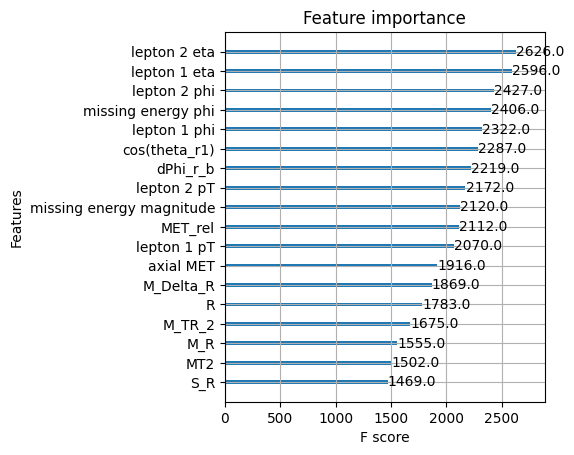

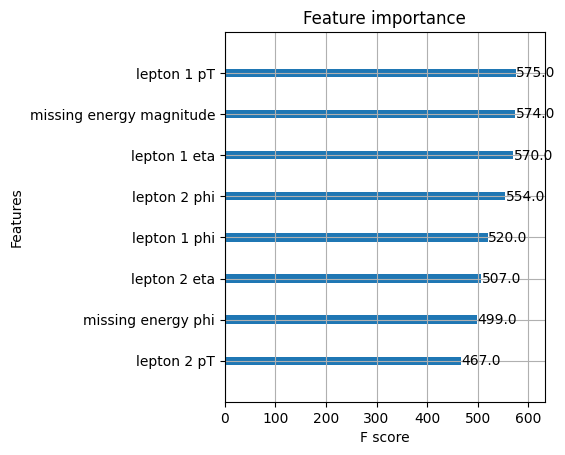

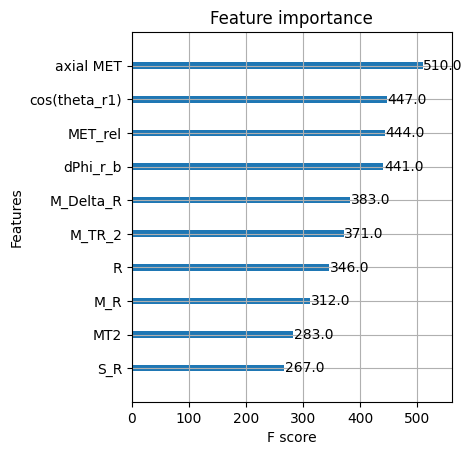

In [43]:
#import ml_style as style
import matplotlib as mpl
#mpl.rcParams.update(style.style)
import matplotlib.pyplot as plt


%matplotlib inline  

fig=plt.figure()
xgb.plot_importance(XGBclassifier, ax=plt.gca())
fig.subplots_adjust(left=0.4)  #
#fig.savefig('SUSYXGBoost1.pdf')

fig=plt.figure()
xgb.plot_importance(XGBclassifier_low, ax=plt.gca())
fig.subplots_adjust(left=0.4)
#fig.savefig('SUSYXGBoost2.pdf')
fig=plt.figure()
xgb.plot_importance(XGBclassifier_high, ax=plt.gca())
fig.subplots_adjust(left=0.4)
#fig.savefig('SUSYXGBoost3.pdf')


## Plot ROC curves

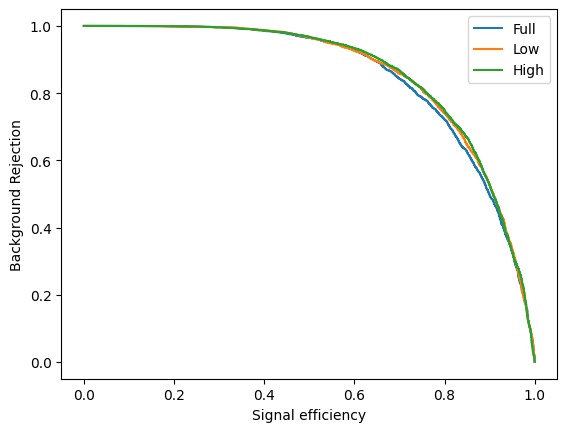

In [45]:
from sklearn.metrics import roc_curve


%matplotlib inline  

fpr, tpr, _ = roc_curve(y_test, y_pred[:,1])
fpr_low, tpr_low, _ = roc_curve(y_test, y_low_pred[:,1])
fpr_high, tpr_high, _ = roc_curve(y_test, y_high_pred[:,1])
plt.figure(1)
plt.plot(tpr, 1-fpr, label='Full')
plt.plot(tpr_low, 1-fpr_low, label='Low')
plt.plot(tpr_high, 1-fpr_high, label='High')
plt.legend(loc=1)
plt.xlabel('Signal efficiency')
plt.ylabel('Background Rejection')
plt.show()
#plt.savefig("SUSY_roc_XGBoost.pdf")



## Optimizing XGBoost

In [48]:
from sklearn.model_selection import GridSearchCV 

#Create values to search over
cv_params = {'max_depth': [6,8,10], 'min_child_weight': [5,10,20], 'learning_rate':[0.05,0.1,0.2]}
ind_params = {'n_estimators': 100, 'seed':1, 'colsample_bytree': 1, 
             'objective': 'binary:logistic'}
opt_XGBclassifier = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 3, n_jobs = -1, verbose=3)

opt_XGBclassifier.fit(X_train, y_train)
opt_XGBclassifier.cv_results_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.05, max_depth=6, min_child_weight=20;, score=0.798 total time=  49.4s
[CV 2/3] END learning_rate=0.05, max_depth=6, min_child_weight=20;, score=0.793 total time=  49.5s
[CV 3/3] END learning_rate=0.05, max_depth=6, min_child_weight=10;, score=0.797 total time=  49.6s
[CV 1/3] END learning_rate=0.05, max_depth=6, min_child_weight=10;, score=0.799 total time=  50.3s
[CV 2/3] END learning_rate=0.05, max_depth=6, min_child_weight=10;, score=0.793 total time=  50.4s
[CV 2/3] END learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.794 total time=  50.6s
[CV 1/3] END learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.799 total time=  50.8s
[CV 3/3] END learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.797 total time=  51.2s
[CV 3/3] END learning_rate=0.05, max_depth=6, min_child_weight=20;, score=0.797 total time=  48.2s
[CV 1/3] END learning_rate=0.05, max_depth=8, min_c

{'mean_fit_time': array([50.65926274, 49.92107089, 48.80599666, 67.19257132, 65.6175402 ,
        55.15405726, 52.69150877, 51.7001733 , 32.80171132, 19.5026567 ,
        19.21353372, 19.62490455, 27.06785599, 26.38163416, 26.00216929,
        33.97964366, 33.30240417, 33.07401562, 19.73150317, 19.88596034,
        20.09140476, 33.46080931, 34.43905656, 35.91878263, 49.91314546,
        49.26383615, 38.72489468]),
 'std_fit_time': array([0.23669824, 0.37951415, 0.58224686, 0.15968178, 0.53923865,
        8.00355219, 0.44194177, 0.14418284, 0.3000003 , 0.23728062,
        0.66095549, 0.24009729, 0.13908758, 0.16589604, 0.15864335,
        0.51292258, 0.24994724, 0.22820432, 0.41945026, 0.29731497,
        0.13837299, 0.45658028, 0.7728446 , 0.48395929, 0.16987444,
        0.41539772, 7.51281249]),
 'mean_score_time': array([0.20463355, 0.19484679, 0.19371486, 0.26595855, 0.3212901 ,
        0.17326665, 0.15806929, 0.17311629, 0.15845037, 0.08278139,
        0.08397969, 0.07692432, 0.102

In [49]:
#Print scores
print('The optimal score on training set is {:0.3f}'.format(opt_XGBclassifier.best_score_))

#Find optimal parameters

print('The optimal parameters for the classifier are:')
print(opt_XGBclassifier.best_params_)

#Fit performance on the test set
XGBclassifier_final=opt_XGBclassifier.best_estimator_
y_pred_final=XGBclassifier_final.predict_proba(X_test)
print("Model Accuray with optimal parameters: {:.2f}%".format(100*XGBclassifier_final.score(X_test, y_test)))
print("The AUC score is {:.2f}".format(roc_auc_score(y_test,y_pred_final[:,1])))


The optimal score on training set is 0.797
The optimal parameters for the classifier are:
{'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 10}
Model Accuray with optimal parameters: 79.69%
The AUC score is 0.87
